In [134]:
from matplotlib import pyplot as plt
import numpy as np
import time
import sys
import pandas as pd
import seaborn as sns

sys.path.append("../PycharmProjects/pythonProject")
import NetworkClass
from imp import reload
reload(NetworkClass)
from NetworkClass import Network

In [135]:
#Parameters (see class for documentation)


length = 40000

dim = (1,10,10)
input_num = 10
Clusters = 2
dt = 0.05

V_syn={(1, 1): 60, (1, 0): -70, (0, 1): 60, (0, 0): -70} # Synapses stregnth (EE,EI,IE,II)
#connect_const = {(1, 1): 0.4, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1} # Probability of connection between two neurons within class (EE,EI,IE,II)
#connect_const = {(1, 1): 0.6, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1} #(EE,EI,IE,II)
connect_const = {(1, 1): 0.9, (1, 0): 0.2, (0, 1): 0.4,(0, 0): 0.1} #(EE,EI,IE,II)
cluster_pr = 0.0 # Connection probability between neurons in cluster 1 and 2 (used to be 0.1)

net = Network(dim=dim,model='SFA',clusters=2,lamb=2.2,inh_frac=0.2,dt=dt,R=0.2,tau=40,Vreset=5,Vr=-70,Vth=-40,alpha=0.05,tauN=80,gk=20,Vk=-88,J=4,tauRise=.8,tauDec=5.8,V_syn=V_syn,tau_psc=(6,3),connect_const=connect_const, input_num=input_num,cluster_pr=cluster_pr)


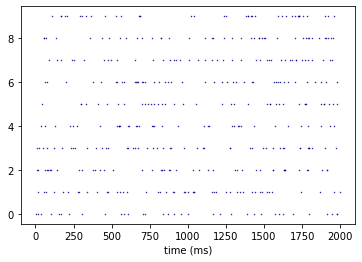

In [138]:
input_spikes_c1=net.generate_spiketrain(length*dt,dt,20/1000,input_num,True,t_start=0,t_end=length//2)
input_spikes_c2=net.generate_spiketrain(length*dt,dt,20/1000,input_num,True,t_start=length//2,t_end=length)
input_spikes = np.concatenate((input_spikes_c1,input_spikes_c2),axis=1)



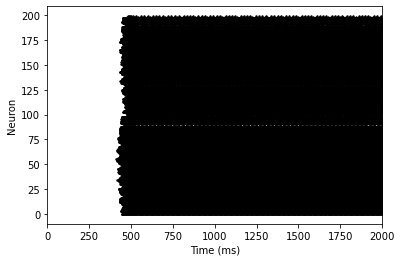

In [133]:
# Old network - connction_type =1 (connection is set by distance from center)

length = 40000


dim = (1,10,10)
input_num = 10
Clusters = 2
dt = 0.05

V_syn={(1, 1): 60, (1, 0): -70, (0, 1): 60, (0, 0): -70} # Synapses stregnth (EE,EI,IE,II)
#connect_const = {(1, 1): 0.4, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1} # Probability of connection between two neurons within class (EE,EI,IE,II)
#connect_const = {(1, 1): 0.6, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1} #(EE,EI,IE,II)
connect_const = {(1, 1): 0.9, (1, 0): 0.2, (0, 1): 0.4,(0, 0): 0.1} #(EE,EI,IE,II)
cluster_pr = 0.1 # Connection probability between neurons in cluster 1 and 2 (used to be 0.1)

net = Network(dim=dim,model='SFA',clusters=2,lamb=2.2,inh_frac=0.2,dt=dt,R=0.2,tau=40,Vreset=5,Vr=-70,Vth=-40,alpha=0.05,tauN=80,gk=20,Vk=-88,J=4,tauRise=.8,tauDec=5.8,V_syn=V_syn,tau_psc=(6,3),connect_const=connect_const, input_num=input_num,cluster_pr=cluster_pr,connect_type=1)

net.run_model(input_spikes,input_type=1)

fig=net.plot_spikes();

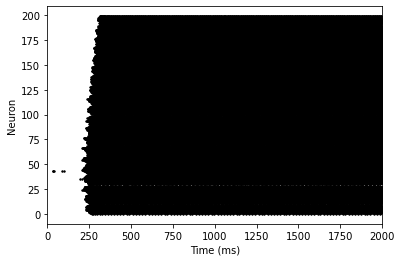

In [121]:
# Nק' network - connction_type = 0 (default) (connection is set by distance between neurons)

length = 40000


dim = (1,10,10)
input_num = 10
Clusters = 2
dt = 0.05

V_syn={(1, 1): 60, (1, 0): -70, (0, 1): 60, (0, 0): -70} # Synapses stregnth (EE,EI,IE,II)
#connect_const = {(1, 1): 0.4, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1} # Probability of connection between two neurons within class (EE,EI,IE,II)
#connect_const = {(1, 1): 0.6, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1} #(EE,EI,IE,II)
connect_const = {(1, 1): 0.9, (1, 0): 0.2, (0, 1): 0.4,(0, 0): 0.1} #(EE,EI,IE,II)
cluster_pr = 0.1 # Connection probability between neurons in cluster 1 and 2 (used to be 0.1)

net = Network(dim=dim,model='SFA',clusters=2,lamb=2.2,inh_frac=0.2,dt=dt,R=0.2,tau=40,Vreset=5,Vr=-70,Vth=-40,alpha=0.05,tauN=80,gk=20,Vk=-88,J=4,tauRise=.8,tauDec=5.8,V_syn=V_syn,tau_psc=(6,3),connect_const=connect_const, input_num=input_num,cluster_pr=cluster_pr)

net.run_model(input_spikes,input_type=1)

fig=net.plot_spikes();

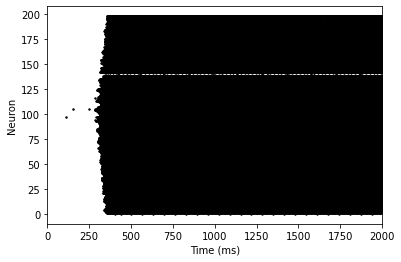

In [122]:
# new network - shuffle cluster map

#new part
neuron_num = 200
cluster_map = np.zeros(neuron_num, dtype=int)
cluster_map[neuron_num//2:] = 1
np.random.shuffle(cluster_map)
cluster_map

length = 40000


dim = (1,10,10)
input_num = 10
Clusters = 2
dt = 0.05

V_syn={(1, 1): 60, (1, 0): -70, (0, 1): 60, (0, 0): -70} # Synapses stregnth (EE,EI,IE,II)
#connect_const = {(1, 1): 0.4, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1} # Probability of connection between two neurons within class (EE,EI,IE,II)
#connect_const = {(1, 1): 0.6, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1} #(EE,EI,IE,II)
connect_const = {(1, 1): 0.9, (1, 0): 0.2, (0, 1): 0.4,(0, 0): 0.1} #(EE,EI,IE,II)
cluster_pr = 0.1 # Connection probability between neurons in cluster 1 and 2 (used to be 0.1)

net = Network(dim=dim,model='SFA',clusters=2,lamb=2.2,inh_frac=0.2,dt=dt,R=0.2,tau=40,Vreset=5,Vr=-70,Vth=-40,alpha=0.05,tauN=80,gk=20,Vk=-88,J=4,tauRise=.8,tauDec=5.8,V_syn=V_syn,tau_psc=(6,3),connect_const=connect_const, input_num=input_num,cluster_pr=cluster_pr,cluster_map=cluster_map)

net.run_model(input_spikes,input_type=1)

fig=net.plot_spikes();

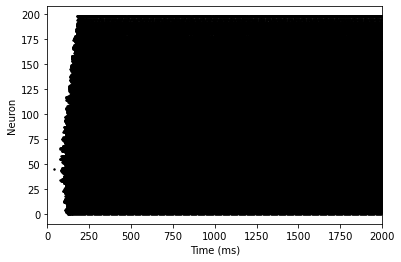

In [171]:
# Nק' network - connction_type = 0 (default) (connection is set by distance between neurons)

length = 40000


dim = (1,10,10)
input_num = 10
Clusters = 2
dt = 0.05

V_syn={(1, 1): 60, (1, 0): -70, (0, 1): 60, (0, 0): -70} # Synapses stregnth (EE,EI,IE,II)
#connect_const = {(1, 1): 0.4, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1} # Probability of connection between two neurons within class (EE,EI,IE,II)
#connect_const = {(1, 1): 0.6, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1} #(EE,EI,IE,II)
connect_const = {(1, 1): 0.9, (1, 0): 0.2, (0, 1): 0.4,(0, 0): 0.1} #(EE,EI,IE,II)
cluster_pr = 0.1 # Connection probability between neurons in cluster 1 and 2 (used to be 0.1)

net = Network(dim=dim,model='SFA',clusters=2,lamb=2.2,inh_frac=0.2,dt=dt,R=0.2,tau=40,Vreset=5,Vr=-70,Vth=-40,alpha=0.05,tauN=80,gk=20,Vk=-88,J=4,tauRise=.8,tauDec=5.8,V_syn=V_syn,tau_psc=(6,3),connect_const=connect_const, input_num=input_num,cluster_pr=cluster_pr)

net.run_model(input_spikes,input_type=1)

fig=net.plot_spikes();

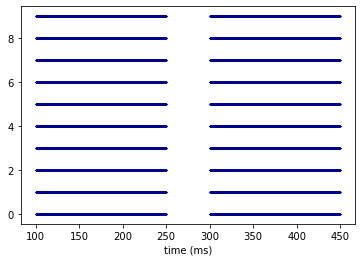

In [170]:
t_clust1_start=100/dt #start input to first cluster at 100ms
t_clust1_end=250/dt

t_clust2_start=300/dt #start input to first cluster at 100ms
t_clust2_end=450/dt

f=1/dt #this gives spiking prob of 1 (See generate_spiketrain)
input_spikes_c1=net.generate_spiketrain(length*dt,dt,f,input_num,True,t_start=t_clust1_start,t_end=t_clust1_end)
input_spikes_c2=net.generate_spiketrain(length*dt,dt,f,input_num,True,t_start=t_clust2_start,t_end=t_clust2_end)

In [ ]:
net.plot_neuron(120)


In [ ]:
#print(net.connections)
net.plot_network();

In [125]:
#Calculate LFP

rows = np.arange(0,10)
cols = np.arange(0,20)

#times = np.arange(15000,35000,10)
times = np.arange(0,40000,10)
phis = np.zeros((rows.shape[0]*cols.shape[0],times.shape[0]))

count=0
for i in rows:

    for j in cols:
        print(j+i*20)
        z, x, y = net.get_pos(j+i*20)
        r = net.get_r(x, y)
        phis[count,:] = net.get_phi(net.EPSC_seq,r,times,0.003,net.dim)
        count+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [131]:
net.plot_neuron()

True

In [ ]:
saveDir='/media/sil2/Literature/Projects/corplex/progress reports/meetings/next/Simulation/'
#np.savetxt(saveDir+'Spikes.txt',net.spikes_seq)
np.savetxt(saveDir+'lfp.txt',phis)



In [ ]:

saveDir='/media/sil2/Literature/Projects/corplex/progress reports/meetings/next/Simulation/simulation outputs/'

#Simulation Parameters (see class for documentation)

length = 40000

dim = (1,10,10)
input_num = 10
Clusters = 2
dt = 0.05

runs_per_param_comb=5

#connectivity and weights parameters
V_syn={(1, 1): 60, (1, 0): -70, (0, 1): 60, (0, 0): -70} # Synapses stregnth (EE,EI,IE,II)
#connect_const = {(1, 1): 0.4, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1} # Probability of connection between two neurons within class (EE,EI,IE,II)
connect_consts = [ #(EE,EI,IE,II)
                    {(1, 1): 0.4, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1},
                    {(1, 1): 0.6, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1},
                    {(1, 1): 0.6, (1, 0): 0.6, (0, 1): 0.4,(0, 0): 0.1},
                    {(1, 1): 0.6, (1, 0): 0.8, (0, 1): 0.4,(0, 0): 0.1},
                    {(1, 1): 0.6, (1, 0): 0.8, (0, 1): 0.8,(0, 0): 0.1},
                    {(1, 1): 0.6, (1, 0): 0.4, (0, 1): 0.8,(0, 0): 0.1},
                    {(1, 1): 0.4, (1, 0): 0.8, (0, 1): 0.8,(0, 0): 0.1},
                    {(1, 1): 0.4, (1, 0): 0.4, (0, 1): 0.8,(0, 0): 0.1},
                ]
cluster_prs = [0.005, 0.01,0.03,0.07,0.1] # Connection probability between neurons in cluster 1 and 2 (used to be 0.1)

run_num=0
for connect_const in connect_consts:
    for cluster_pr in cluster_prs:
        for i in range(runs_per_param_comb):
            run_num += 1
            print('Run Number '+str(run_num))
            net = Network(dim=dim,model='SFA',clusters=2,lamb=2.2,inh_frac=0.2,dt=dt,R=0.2,tau=40,Vreset=5,Vr=-70,Vth=-40,alpha=0.05,tauN=80,gk=20,Vk=-88,J=4,tauRise=.8,tauDec=5.8,V_syn=V_syn,tau_psc=(6,3),connect_const=connect_const, input_num=input_num,cluster_pr=cluster_pr)
            input_spikes=net.generate_spiketrain(length*dt,dt,20/1000,input_num,False)
            net.run_model(input_spikes,input_type=1)

            #Calculate LFP
            rows = np.arange(0,10)
            cols = np.arange(0,20)

            times = np.arange(0,40000,10)
            phis = np.zeros((rows.shape[0]*cols.shape[0],times.shape[0]))

            count=0
            for row in rows:
                for col in cols:
                    #print(col+row*20)
                    z, x, y = net.get_pos(col+row*20)
                    r = net.get_r(x, y)
                    phis[count,:] = net.get_phi(net.EPSC_seq,r,times,0.003,net.dim)
                    count+=1
            #export network output
            np.savetxt(saveDir+'Spikes '+str(run_num)+'.txt',net.spikes_seq,header='V_syns '+str(V_syn)+' connect_const '+str(connect_const)+' cluster_pr '+str(cluster_pr))
            np.savetxt(saveDir+'lfp'+str(run_num)+'.txt',phis,header='V_syns '+str(V_syn)+' connect_const '+str(connect_const)+' cluster_pr '+str(cluster_pr))

In [ ]:
saveDir='/media/sil2/Literature/Projects/corplex/progress reports/meetings/next/Simulation/working combos/simulation outputs/'

#Simulation Parameters (see class for documentation)

length = 40000

dim = (1,10,10)
input_num = 10
Clusters = 2
dt = 0.05

runs_per_param_comb=1

#connectivity and weights parameters
V_syn={(1, 1): 60, (1, 0): -70, (0, 1): 60, (0, 0): -70} # Synapses stregnth (EE,EI,IE,II)

#connect_consts=[{(1, 1): 0.6, (1, 0): 0.5, (0, 1): 0.4, (0, 0): 0.1}, {(1, 1): 0.6, (1, 0): 0.4, (0, 1): 0.3, (0, 0): 0.1} ]
connect_consts=[{(1, 1): 0.6, (1, 0): 0.5, (0, 1): 0.4, (0, 0): 0.1}]
#cluster_prs=[0.03, 0.7]
cluster_prs=[0.03]

for combo_num in range(len(connect_consts)):
    run_num=0
    connect_const = connect_consts[combo_num]
    cluster_pr = cluster_prs[combo_num]
    for i in range(runs_per_param_comb):
        run_num += 1
        print('Combo Num '+str(combo_num)+' Run Number '+str(run_num))
        net = Network(dim=dim,model='SFA',clusters=2,lamb=2.2,inh_frac=0.2,dt=dt,R=0.2,tau=40,Vreset=5,Vr=-70,Vth=-40,alpha=0.05,tauN=80,gk=20,Vk=-88,J=4,tauRise=.8,tauDec=5.8,V_syn=V_syn,tau_psc=(6,3),connect_const=connect_const, input_num=input_num,cluster_pr=cluster_pr)
        input_spikes=net.generate_spiketrain(length*dt,dt,20/1000,input_num,False)
        net.run_model(input_spikes,input_type=1)

        #Calculate LFP
        rows = np.arange(0,10)
        cols = np.arange(0,20)

        times = np.arange(0,40000,1)
        phis = np.zeros((rows.shape[0]*cols.shape[0],times.shape[0]))

        count=0
        for row in rows:
            for col in cols:
                #print(col+row*20)
                z, x, y = net.get_pos(col+row*20)
                r = net.get_r(x, y)
                phis[count,:] = net.get_phi(net.EPSC_seq,r,times,0.003,net.dim)
                count+=1

In [ ]:
        #export network output
        np.savetxt(saveDir+'Spikes Combo Num '+str(combo_num)+' Run Num '+str(run_num)+'.txt',net.spikes_seq,header='V_syns '+str(V_syn)+' connect_const '+str(connect_const)+' cluster_pr '+str(cluster_pr))
        np.savetxt(saveDir+'lfp Combo Num '+str(combo_num)+' Run Num '+str(run_num)+'.txt',phis,header='V_syns '+str(V_syn)+' connect_const '+str(connect_const)+' cluster_pr '+str(cluster_pr))